<a href="https://colab.research.google.com/github/jiin-son/weather_india/blob/main/Explanatory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explanatory Data Analysis on Weater in India Data

####1. Load Packages


In [ ]:
# Load all the packages that are used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import seaborn as sns

####2. Load Data

In [ ]:
# Choose the file from directory
from google.colab import files
uploaded = files.upload()

Saving weather_india.csv to weather_india.csv


In [ ]:
# Store the dataset in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['weather_india.csv']))
# Dataset is now stored in a Pandas Dataframe

####3. Explore data

In [ ]:
df.head()

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [ ]:
# drop the first column (index column)
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [ ]:
# year range
df['YEAR'].describe()
# from 1901 to 2017

count     117.000000
mean     1959.000000
std        33.919021
min      1901.000000
25%      1930.000000
50%      1959.000000
75%      1988.000000
max      2017.000000
Name: YEAR, dtype: float64

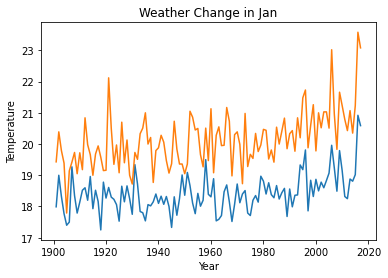

In [ ]:
# plot only Jan and Feb data
plt.plot(df['YEAR'], df['JAN'])
plt.plot(df['YEAR'], df['FEB'])
plt.title('Weather Change in Jan')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

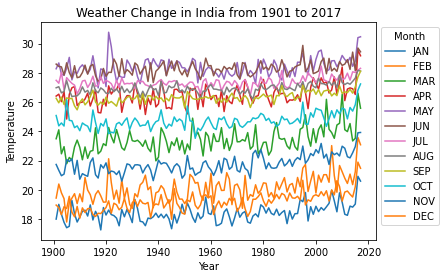

In [ ]:
# plot all the months using loop -> hard to see
for i in df.columns[1:]:
  plt.plot(df['YEAR'], df[i], label = i)
plt.title('Weather Change in India from 1901 to 2017')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [ ]:
# looks like more upward in Winter time
#Q1, Q2, Q3, Q4
# Winter - Dec, Jan, Feb
# Spring - Mar, Apr, May
# Summer - Jun, Jul, Aug
# Fall - Sep, Oct, Nov

season = df.copy()
season['Winter'] = season[['DEC', 'JAN', 'FEB']].mean(axis = 1)
season.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Winter
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95,18.790000
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78,19.390000
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29,18.800000
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84,18.666667
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71,17.966667


In [ ]:
# create fields that takes average of each season
season['Spring'] = season[['MAR', 'APR', 'MAY']].mean(axis = 1)
season['Summer'] = season[['JUN', 'JUL', 'AUG']].mean(axis = 1)
season['Fall'] = season[['SEP', 'OCT', 'NOV']].mean(axis = 1)
season.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Winter,Spring,Summer,Fall
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95,18.790000,26.060000,27.690000,24.356667
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78,19.390000,26.440000,27.593333,23.883333
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29,18.800000,25.473333,27.693333,23.956667
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84,18.666667,25.836667,27.140000,23.756667
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71,17.966667,24.980000,27.943333,24.840000


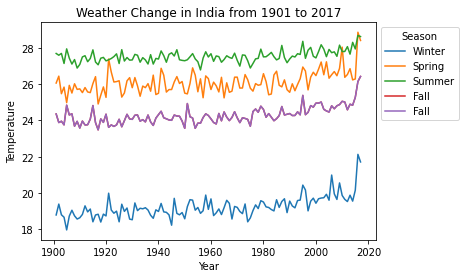

In [ ]:
# Plot the trend for average temperature for each season
for i in season.columns[13:]:
  plt.plot(season['YEAR'], season[i], label = i)
plt.plot(season['YEAR'], season[i], label = i)
plt.title('Weather Change in India from 1901 to 2017')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [ ]:
dates = {}

i = 0
for y in df['YEAR']:
    for m in df.columns[1:]:
        
        dat = str(m) + '/' + str(y)
        dates[dat] = df[m][i]
    i += 1
  
dates = pd.DataFrame(pd.Series(dates).reset_index())
dates.columns = ['date', 'temp']

dates['date'] = pd.to_datetime(dates['date'], format= '%b/%Y')
dates['year'] = dates['date'].dt.year
dates['month'] = dates['date'].dt.month_name()

dates.head()
# please practice on this 

,date,temp,year,month
0,1901-01-01,17.99,1901,January
1,1901-02-01,19.43,1901,February
2,1901-03-01,23.49,1901,March
3,1901-04-01,26.41,1901,April
4,1901-05-01,28.28,1901,May


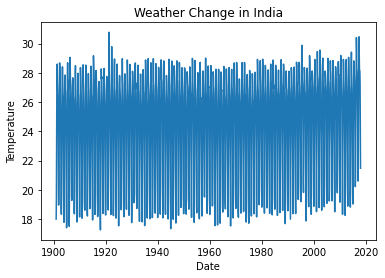

In [ ]:
plt.plot(dates['date'], dates['temp'])
plt.title('Weather Change in India')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()